<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Lecture_code/Lec10-RandomForest.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - Random forest
---

This is the lecture note for **random forest**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to random forest. I encourage you to read further about random forests. </p>

Read more:

- [RandomForestRegressor - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- [RandomForestClassifier - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [Tune hyperparameters - towardsdatascience](https://towardsdatascience.com/random-forest-hyperparameters-and-how-to-fine-tune-them-17aee785ee0d)
- [Random forest - wikipedia](https://en.wikipedia.org/wiki/Random_forest)
- [Lecture slides chapter 8 - ISLR](https://hastie.su.domains/ISLR2/Slides/Ch8_Tree_Based_Methods.pdf)
- [ISLP pp. 331-353](https://www.statlearning.com/)
---


## Bagging 
- In general for independent observations $Z_1, \ldots, Z_n$ with variance $\sigma^2$ each. Mean of the observations is $\bar{Z} = \frac{\sigma^2}{n}$. So by averaging set of observation we reduce the variance.
- we do this by bagging - bootstrap aggregation. We sample multiple times from a training set and average over all the predictions.
- For classification trees we use the majority vote among all the predictions by the bootstrapped trees

## Random forest
- grow many decision trees on bootstrapped samples
- randomly choose $m \approx \sqrt{p}$ predictors/features as split candidates
- choose one of these $m$ features for the split
- new $m$ features are chosen for each split

In [28]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns

df = pd.read_csv("../data/Heart.csv", index_col=0)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


<Axes: xlabel='AHD', ylabel='count'>

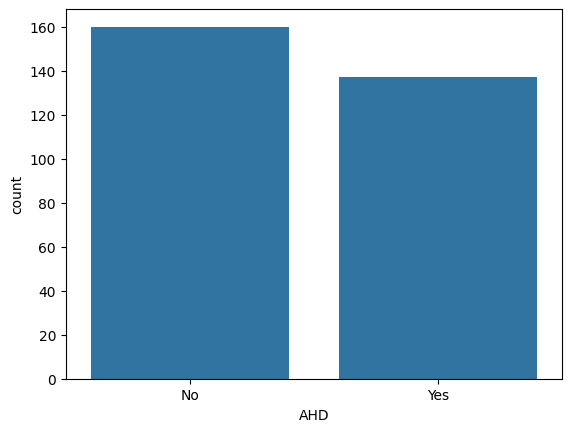

In [30]:
df.dropna(inplace=True)

sns.countplot(data=df, x="AHD")

In [31]:
df_dummies = pd.get_dummies(df, drop_first=True)
X, y = df_dummies.drop("AHD_Yes", axis=1), df_dummies["AHD_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
y_pred

array([False,  True, False,  True, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True,  True, False,  True,  True,  True, False,
        True, False,  True, False, False, False,  True, False, False,
        True, False, False, False,  True,  True])

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators": [100, 150, 200, 300], "criterion": ["gini", "entropy"], "max_features":["auto", "sqrt", "log2"]}
clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=1, scoring="recall")
clf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/home/raphael/ITHS/AI24/Maskininlärning/Machine-learning-AI24/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/raphael/ITHS/AI24/Maskininlärning/Machine-learning-AI24/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/raphael/ITHS/AI24/Maskininlärning/Machine-learning-AI24/.venv/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    es

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='recall', verbose=1)

In [34]:
clf.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}

## Evaluation
- default
- hyperparameters tuned

              precision    recall  f1-score   support

       False       0.89      0.89      0.89        36
        True       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



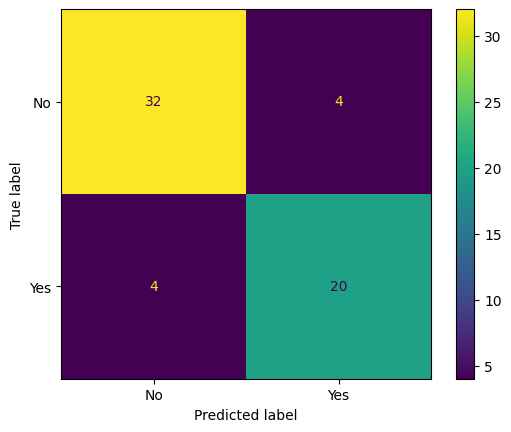

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def evalute_classification(y_test, y_pred, labels=["No", "Yes"]):
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=labels).plot()

evalute_classification(y_test, y_pred)

              precision    recall  f1-score   support

       False       0.89      0.89      0.89        36
        True       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



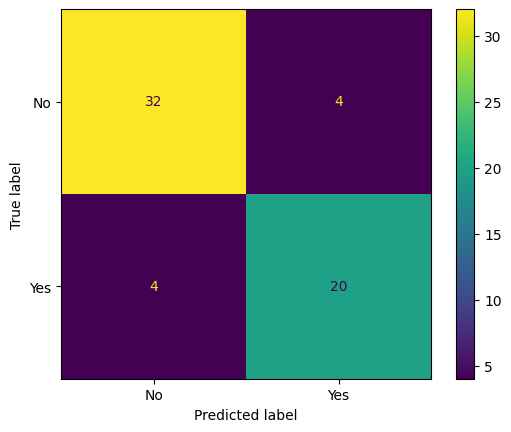

In [36]:
y_pred_tuned = clf.predict(X_test)
evalute_classification(y_test, y_pred_tuned)

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---
